/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


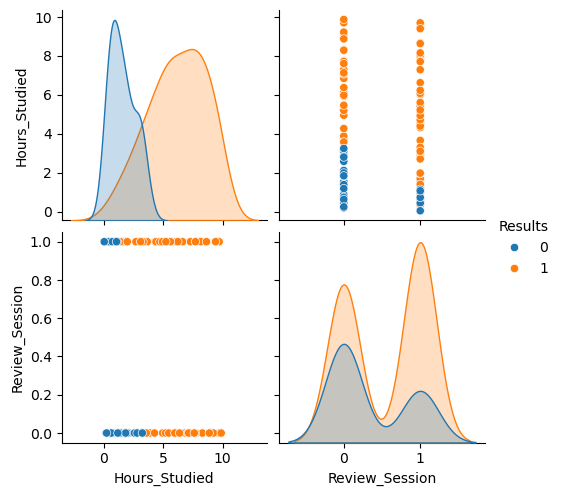

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Reloading the dataset from the newly uploaded file
file_path = './student_data.csv'
student_data = pd.read_csv(file_path)

# Display the first few rows of the dataset for inspection
student_data.head()

sns.pairplot(student_data, hue='Results', diag_kind='kde')
plt.show()

Intercept: [-4.58136123]
Coefficients: [[1.40365599 1.42846816]]
Accuracy: 0.85
AUC: 0.9642857142857144


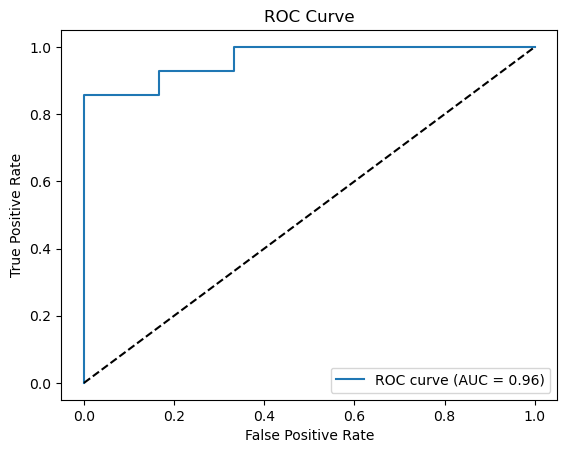

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Split the data into features and target
X = student_data[['Hours_Studied', 'Review_Session']]
y = student_data['Results']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# AUC and ROC
y_pred_prob = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print("AUC:", auc)

# Plot ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [9]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load your data
# Assuming your student_data dataframe is already loaded:
X = student_data[['Hours_Studied', 'Review_Session']]
y = student_data['Results']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Fit SVM with a linear kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Predict and evaluate linear SVM
y_pred_linear = linear_svm.predict(X_test)
print("Accuracy with Linear Kernel:", accuracy_score(y_test, y_pred_linear))
print("Classification Report (Linear Kernel):")
print(classification_report(y_test, y_pred_linear))

# 2. Fit SVM with an RBF kernel using GridSearchCV to find the best gamma
param_grid = {'gamma': [0.1, 0.01, 0.001, 1, 10, 100]}
rbf_svm = SVC(kernel='rbf')

# Use GridSearchCV to find the best gamma with 5-fold cross-validation
grid_search = GridSearchCV(rbf_svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best gamma value
print("Best Gamma Parameter:", grid_search.best_params_)

# Predict and evaluate RBF SVM
y_pred_rbf = grid_search.predict(X_test)
print("Accuracy with RBF Kernel:", accuracy_score(y_test, y_pred_rbf))
print("Classification Report (RBF Kernel):")
print(classification_report(y_test, y_pred_rbf))


Accuracy with Linear Kernel: 0.85
Classification Report (Linear Kernel):
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20

Best Gamma Parameter: {'gamma': 1}
Accuracy with RBF Kernel: 0.85
Classification Report (RBF Kernel):
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20

